In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline
from urllib.parse import urlparse, urlunparse, parse_qs, urlencode

# URL에 쿼리 파라미터를 추가하는 함수
def modify_url(url, params):
    url_parts = list(urlparse(url))
    query = dict(parse_qs(url_parts[4]))
    query.update(params)
    url_parts[4] = urlencode(query, doseq=True)
    return urlunparse(url_parts)

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

raw = pd.read_csv("D:/에어비앤비/파리/listings.csv")

df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")


# 파라미터 추가
params = {'locale': 'en'}

# 각 URL을 순회하면서 수정
df['url'] = [modify_url(url, params) for url in df['url']]


처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


In [3]:
df.isnull().sum()

숙소_id          0
호스트_id         0
슈퍼호스트          0
숙소_수           0
숙소_지역          0
숙소_유형          0
수용_인원수         0
욕실수            0
침실수            0
침대수            0
편의시설           0
숙소_가격          0
최소_숙박일         0
최대_숙박일         0
리뷰수            0
30일_리뷰수        0
리뷰점수           0
숙소_정확성_리뷰점수    0
숙소_청결도_리뷰점수    0
숙소_체크인_리뷰점수    0
숙소_소통_리뷰점수     0
숙소_위치_리뷰점수     0
숙소_가격_리뷰점수     0
평균_리뷰수         0
url            0
숙소_특징          0
12개월_리뷰수       0
예약가능여부         0
dtype: int64

게스트선호 조건

In [4]:
df[(df['리뷰점수'] >= 4.9) & (df['리뷰수'] >= 5) & (df['슈퍼호스트'] == 't')]

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용_인원수,욕실수,침실수,침대수,...,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url,숙소_특징,12개월_리뷰수,예약가능여부
27,9952,33534,t,1.0,Popincourt,Entire home/apt,2,1.0,1.0,1.0,...,4.88,4.98,4.86,4.88,4.90,0.37,https://www.airbnb.com/rooms/9952?locale=en,Entire rental unit,7,t
45,195564,938912,t,1.0,Gobelins,Entire home/apt,3,1.0,1.0,2.0,...,4.80,4.98,5.00,4.83,4.83,0.47,https://www.airbnb.com/rooms/195564?locale=en,Entire rental unit,5,t
48,54377,247562,t,3.0,Buttes-Montmartre,Entire home/apt,4,1.0,1.0,1.0,...,4.73,4.98,5.00,4.53,4.88,1.30,https://www.airbnb.com/rooms/54377?locale=en,Entire rental unit,35,t
53,55348,261355,t,7.0,Hôtel-de-Ville,Entire home/apt,2,1.0,0.0,1.0,...,4.95,4.91,4.94,4.98,4.85,0.93,https://www.airbnb.com/rooms/55348?locale=en,Entire rental unit,25,t
73,16626,64627,t,3.0,Luxembourg,Private room,4,1.5,1.0,2.0,...,4.83,4.83,4.85,4.98,4.80,0.88,https://www.airbnb.com/rooms/16626?locale=en,Private room in rental unit,23,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77625,1077678541993753725,33676510,t,2.0,Entrepôt,Entire home/apt,2,1.0,1.0,2.0,...,5.00,5.00,5.00,4.80,5.00,4.41,https://www.airbnb.com/rooms/10776785419937537...,Entire rental unit,5,t
78171,1079775036826711802,14267686,t,1.0,Observatoire,Private room,2,1.5,1.0,1.0,...,4.92,5.00,4.92,4.92,4.83,8.78,https://www.airbnb.com/rooms/10797750368267118...,Private room in rental unit,12,t
78192,1080250485815449505,242694272,t,3.0,Buttes-Montmartre,Entire home/apt,4,1.5,2.0,2.0,...,4.86,5.00,5.00,5.00,5.00,6.00,https://www.airbnb.com/rooms/10802504858154495...,Entire rental unit,7,t
78307,1080943945230018972,33985517,t,46.0,Opéra,Entire home/apt,6,3.5,3.0,3.0,...,5.00,5.00,5.00,5.00,4.80,3.41,https://www.airbnb.com/rooms/10809439452300189...,Entire rental unit,5,t


Text(0.5, 1.0, 'Heatmap of Selected Columns')

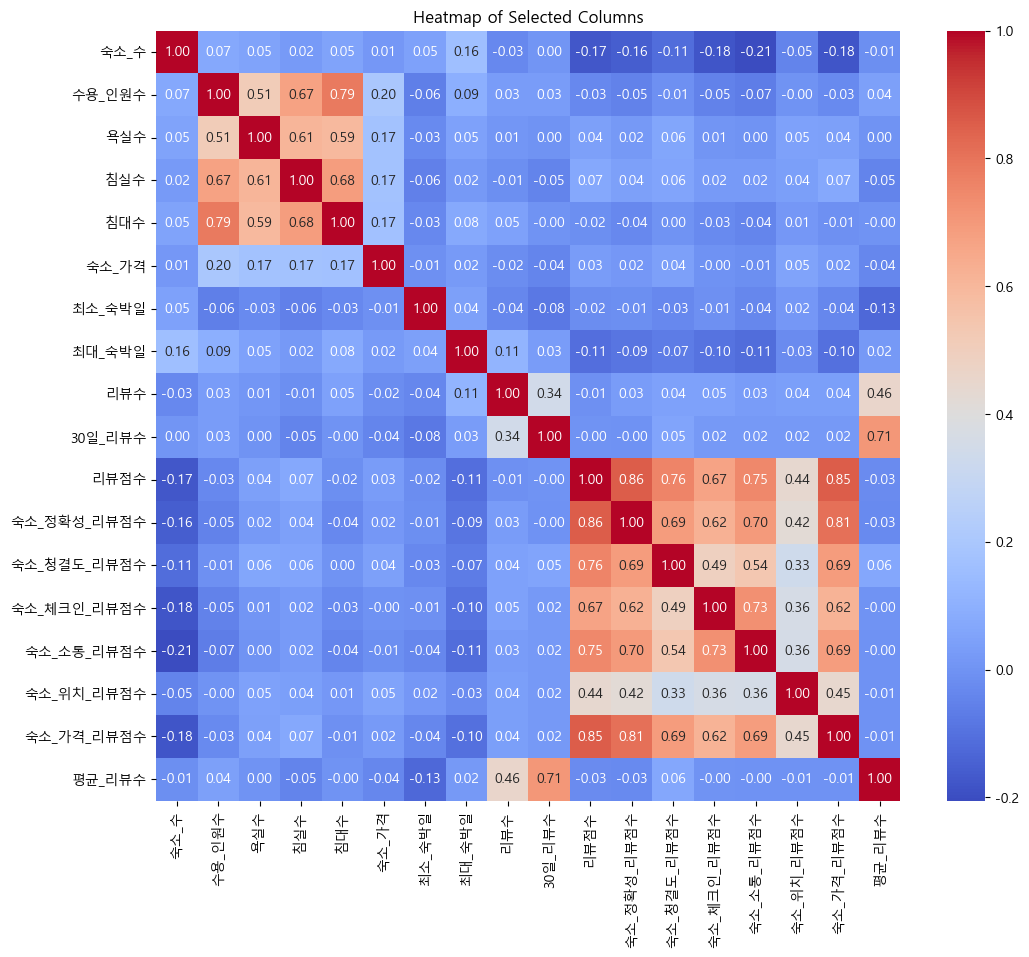

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# 관심 있는 컬럼 선택
selected_columns = df[[ '숙소_수', '수용_인원수', 
                      '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일', 
                      '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수']]

# 상관관계 매트릭스 계산
corr_matrix = selected_columns.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Selected Columns')

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# 슈퍼호스트 컬럼이 't' 또는 'f'로 표현되어 있다고 가정하고, 이를 숫자형으로 변환
df['슈퍼호스트'] = df['슈퍼호스트'].map({'t': 1, 'f': 0})

# 좋은 숙소 라벨 생성
df['좋은_숙소'] = ((df['리뷰점수'] >= 4.9) & (df['리뷰수'] >= 5) & (df['슈퍼호스트'] == 1)).astype(int)

# 필요한 특성 선택
features = ['숙소_수', '수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수', '리뷰점수']
X = df[features]
y = df['좋은_숙소']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [7]:

# 랜덤 포레스트 분류기
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
predictions = model.predict(X_test_scaled)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.9240077444336883

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      5234
           1       0.73      0.81      0.77       964

    accuracy                           0.92      6198
   macro avg       0.85      0.88      0.86      6198
weighted avg       0.93      0.92      0.93      6198



정확도 92
좋은 숙소 1:정밀도 73
그외 숙소 0:정밀도 96
0의 재현율 94
1의 재현율 81
클래스 '0'은 0.95, 클래스 '1'은 0.77의 F1 점수
macro avg :정밀도, 재현율, F1 점수가 각각 약 85%, 88%, 86%입니다.
weighted avg:가중평균 :93%, 92%, 93%입니다.

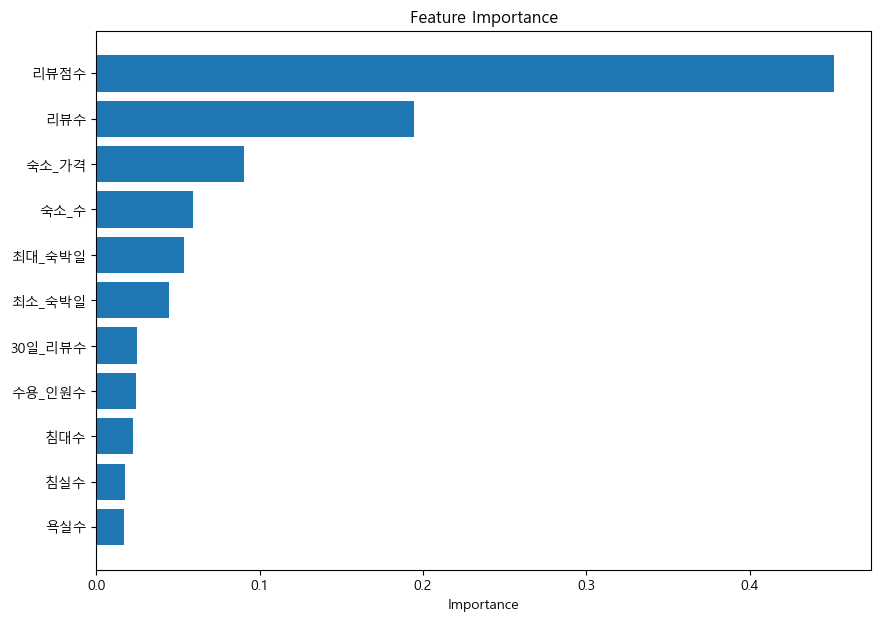

In [8]:
import matplotlib.pyplot as plt

# 피처 중요도 추출 및 시각화
feature_importances = model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10,7))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


숙소 가격 (숙소_가격): 숙소 가격의 중요도가 높게 나타나, 가격이 게스트의 선택에 상당한 영향을 미치고 있음을 보여줍니다.
침대 수 (침대수), 침실 수 (침실수), 욕실 수 (욕실수): 이 특성들도 숙소의 편의성과 직결되어 중요도가 높게 나타났습니다.
최소 숙박일 (최소_숙박일), 최대 숙박일 (최대_숙박일), 30일 리뷰수 (30일_리뷰수): 이 특성들의 중요도는 상대적으로 낮게 나타났습니다.

로지스틱 회귀모델

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 모델 초기화
logreg = LogisticRegression(max_iter=1000)

# 모델 훈련
logreg.fit(X_train_scaled, y_train)

# 예측 수행
logreg_predictions = logreg.predict(X_test_scaled)

# 성능 평가
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, logreg_predictions))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logreg_predictions))


Accuracy of Logistic Regression:  0.8531784446595676

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      5234
           1       0.63      0.14      0.22       964

    accuracy                           0.85      6198
   macro avg       0.75      0.56      0.57      6198
weighted avg       0.82      0.85      0.81      6198



In [ ]:
정확도 85


서포트 벡터 머신

In [10]:
from sklearn.svm import SVC

# 모델 초기화
svm_model = SVC(kernel='linear')  # 'linear', 'poly', 'rbf', 'sigmoid' 중 선택 가능

# 모델 훈련
svm_model.fit(X_train_scaled, y_train)

# 예측 수행
svm_predictions = svm_model.predict(X_test_scaled)

# 성능 평가
print("Accuracy of SVM: ", accuracy_score(y_test, svm_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))


Accuracy of SVM:  0.8444659567602453

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92      5234
           1       0.00      0.00      0.00       964

    accuracy                           0.84      6198
   macro avg       0.42      0.50      0.46      6198
weighted avg       0.71      0.84      0.77      6198



c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

정확도 84


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


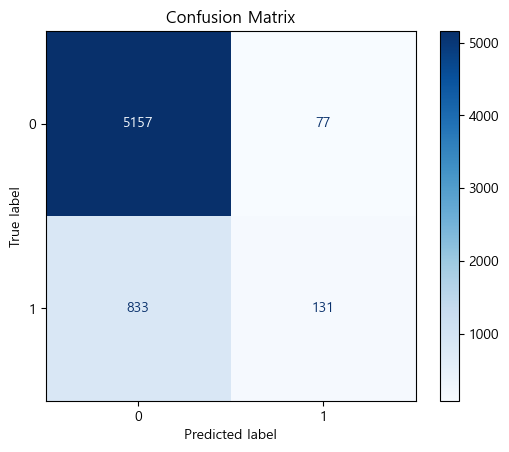

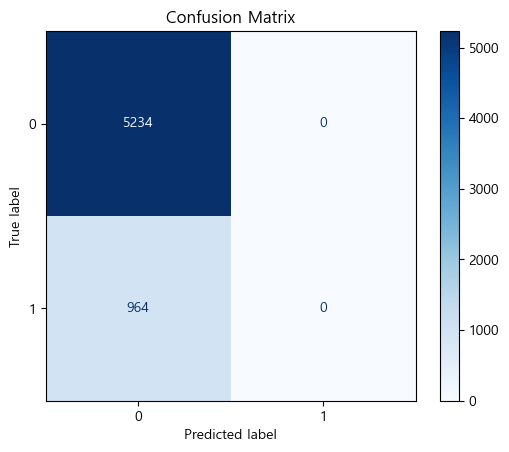

In [12]:
def plot_confusion_matrix(model, X, y):
    predictions = model.predict(X)
    cm = confusion_matrix(y, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# 로지스틱 회귀의 혼동 행렬
plot_confusion_matrix(logreg, X_test_scaled, y_test)

# SVM의 혼동 행렬
plot_confusion_matrix(svm_model, X_test_scaled, y_test)


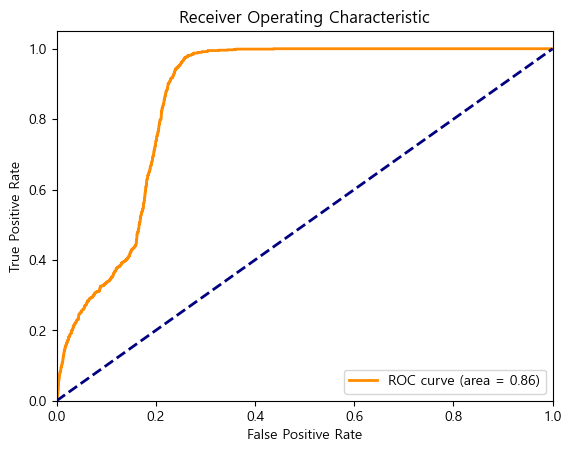

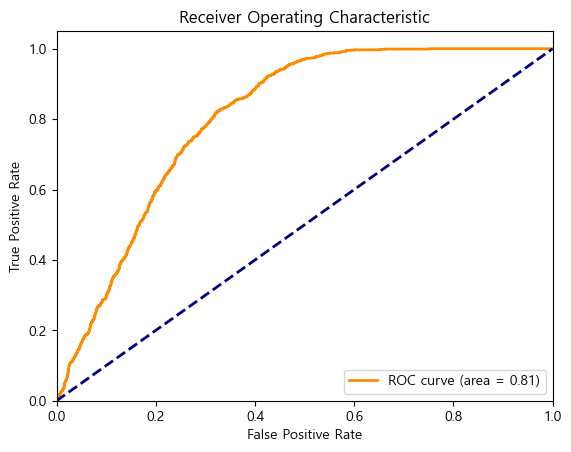

In [13]:
def plot_roc_curve(model, X, y):
    probs = model.decision_function(X) if hasattr(model, "decision_function") else model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# 로지스틱 회귀의 ROC 곡선
plot_roc_curve(logreg, X_test_scaled, y_test)

# SVM의 ROC 곡선
plot_roc_curve(svm_model, X_test_scaled, y_test)
